## QUESTION 1
Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.


Bangalore 412
Mumbai 303
New Delhi 215
Gurgaon 166
Noida 46


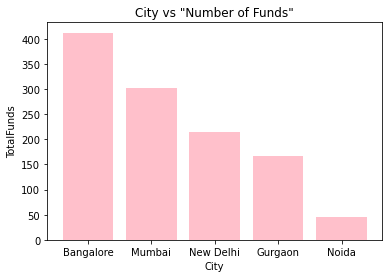

In [24]:
#CODE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('data/startup_funding.csv',encoding = 'utf-8')
df.dropna(subset=["CityLocation"],inplace=True)
#function to strip city names
def Cities(city):
    return city.split('/')[0].strip()
#correcting names
df['CityLocation'] = df['CityLocation'].apply(Cities)
df['CityLocation'].replace("Delhi","New Delhi",inplace = True)
df['CityLocation'].replace("bangalore","Bangalore",inplace = True)

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
df = df.groupby('CityLocation')['AmountInUSD'].count()
df = df.sort_values(ascending = False)
#checking according to conditions
df=df[(df.index=='Bangalore') | (df.index=='Mumbai') | (df.index=='New Delhi') |  (df.index=='Noida') | (df.index=='Gurgaon') ]
city = df.index
funds = df.values
#for printing
for i in range(len(city)):
    print(city[i],funds[i])

plt.bar(city ,funds, color="pink")
plt.ylabel('TotalFunds')
plt.xlabel('City')
plt.title('City vs "Number of Funds"')
plt.show()

# EXPLANATION OF CODE AND OUTPUT OF QUESTION 1
the friend should choose Bangalore as an investing option as according to the plot Banglore has the maximum number of fundings.
since the friend has restrictions of opening the startup in only bombay, bangalore, NCR, I have given those conditions in the code. I have grouped the cities with fundings to see which city gets the most investments. According to the bar graph, the friend should invest in Bangalore as they have the most fundings and the friend has most chances of getting invested there.


## QUESTION 2
Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


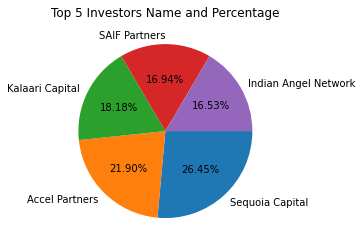

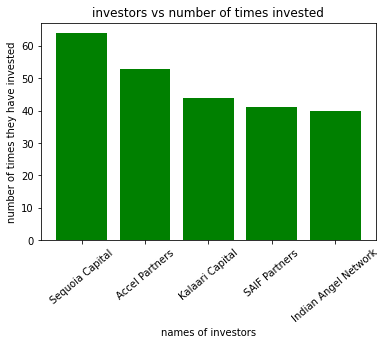

In [27]:
import pandas as pd
import numpy as np
import collections

df = pd.read_csv('data/startup_funding.csv',encoding = 'utf-8')
df.InvestorsName.fillna("",inplace = True)
df = df[df.InvestorsName != 'Undisclosed Investors']
df = df[df.InvestorsName != 'Undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investor']
investors = df.InvestorsName

investors_name = []
for i in investors:
    if i != "":
        c = i.split(",")
        for j in c:
            investors_name.append(j.strip())
dicti = {}
for i in investors_name:
    dicti[i] = dicti.get(i,0) + 1
dct_keys = sorted(dicti,key=dicti.get,reverse=True)
count = []
names = []
for i in range(5):
    print(dct_keys[i],dicti[dct_keys[i]])
    names.append(dct_keys[i])
    count.append(dicti[dct_keys[i]])
plt.pie(count,labels=names,autopct='%0.2f%%',counterclock=False)
plt.title('Top 5 Investors Name and Percentage')
plt.show()
plt.bar(names ,count, color="green")
plt.ylabel('number of times they have invested')
plt.xlabel('names of investors')
plt.xticks(rotation=40)
plt.title('investors vs number of times invested')
plt.show()

## EXPLANATION OF CODE AND GRAPH QUESTION 2
I have ignored the undisclosed investors and then i have stored the names of investors who have invested the maximum number of times in a startup along with the times they have invested in it. the pie chart is showing the names of the the top 5 investors and according to this my friend should contact these investors. The pie chart is also showing the percentage of how many number of times these 5 top investors have invested in startups. The bar graph shows the number of times the investor has invested.

## QUESTION 3
After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


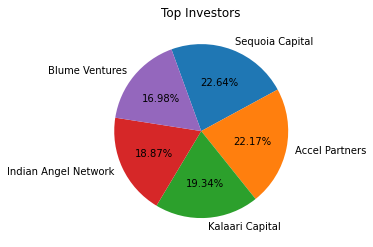

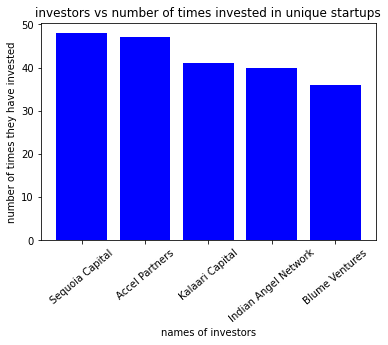

In [28]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('data/startup_funding.csv',encoding = 'utf-8')
df=df.dropna(subset=['InvestorsName', 'StartupName'])

df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)
df = df[df.InvestorsName != 'Undisclosed Investors']
df = df[df.InvestorsName != 'Undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investor']


investor = []
startup = []

for index,row in df.iterrows():
    s = row['InvestorsName']
    v = row['StartupName']
    
    i = str(s)
    l = i.split(',')
    
    for j in l:
        if j != '':
            j = j.strip()
            investor.append(j)
            startup.append(v)

df1 = pd.DataFrame({'InvestorsName' : investor,'StartupName' : startup})
df1 = df1.groupby('InvestorsName')['StartupName'].nunique()
df1 = df1.sort_values(ascending = False)
df1 = df1.head(5)
name = []
count = []
for i in range(5):
    print(df1.index[i],df1.values[i])
    name.append(df1.index[i])
    count.append(df1.values[i])
    
plt.pie(count, labels = name, autopct='%0.2f%%',counterclock=False,startangle=110)

plt.title('Top Investors')
plt.show()
plt.bar(name ,count, color="blue")
plt.ylabel('number of times they have invested')
plt.xlabel('names of investors')
plt.xticks(rotation=40)
plt.title('investors vs number of times invested in unique startups')
plt.show()

## EXPLANATION OF CODE AND GRAPH OF QUESTION 3
First i have changed the names according to the question. then i have ignored the undisclosed investors. then I have found the top 5 investors who have invested maximum number of times in different companies. the pie plot is showing the name of the top five investors along with a percentage. the pie plot is showing the name of the investors who have invested in unique startups along with the times they've invested. friend should contact these top 5 investors

## QUESTION 4
Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


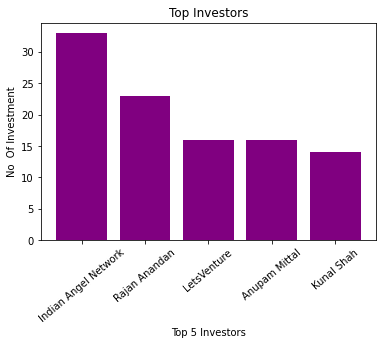

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('data/startup_funding.csv',encoding = 'utf-8')
df=df.dropna(subset=['InvestorsName', 'StartupName'])

df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace = True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace = True)
df['InvestmentType'].replace('DebtFunding','Debt Funding',inplace = True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace = True)
df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)
df = df[df.InvestorsName != 'Undisclosed Investors']
df = df[df.InvestorsName != 'Undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investor']

df = df[( (df.InvestmentType == 'Seed Funding') | (df.InvestmentType == 'Crowd Funding'))]
investor = []
startup = []

for index,row in df.iterrows():
    s = row['InvestorsName']
    v = row['StartupName']
    
    i = str(s)
    l = i.split(',')
    
    for j in l:
        if j != '':
            j = j.strip()
            investor.append(j)
            startup.append(v)

df1 = pd.DataFrame({'InvestorsName' : investor,'StartupName' : startup})
df1 = df1.groupby('InvestorsName')['StartupName'].nunique()
df1 = df1.sort_values(ascending = False)
df1 = df1.head(5)
name = []
count = []
for i in range(5):
    print(df1.index[i],df1.values[i])
    name.append(df1.index[i])
    count.append(df1.values[i])
    
plt.bar(name,count, color="purple")
plt.xticks(rotation=40)
plt.xlabel('Top 5 Investors')
plt.ylabel('No  Of Investment')
plt.title('Top Investors')
plt.show()


## EXPLANATION OF CODE AND GRAPH OF QUESTION 4
Since my friend wants to target investors who's investment type is crowd funding or seed funding we have chosen the condition to fullfill the criteria. then i've corrected the names of the important companies/startups etc and ignored undisclosed investors. then i have found the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. The same has been displayed in a bar graph along with the number of investments shown. these investors have invested in new startups and will help for sure.


## QUESTION 5
Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


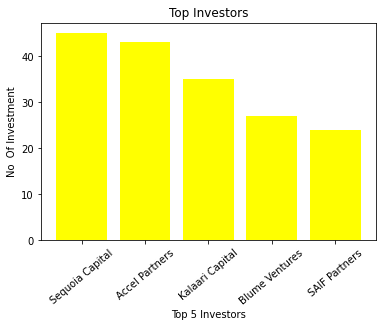

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('data/startup_funding.csv',encoding = 'utf-8')
df=df.dropna(subset=['InvestorsName', 'StartupName'])

df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace = True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace = True)
df['InvestmentType'].replace('DebtFunding','Debt Funding',inplace = True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace = True)
df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)
df = df[df.InvestorsName != 'Undisclosed Investors']
df = df[df.InvestorsName != 'Undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investor']

df = df[( (df.InvestmentType == 'Private Equity'))]
investor = []
startup = []

for index,row in df.iterrows():
    s = row['InvestorsName']
    v = row['StartupName']
    
    i = str(s)
    l = i.split(',')
    
    for j in l:
        if j != '':
            j = j.strip()
            investor.append(j)
            startup.append(v)

df1 = pd.DataFrame({'InvestorsName' : investor,'StartupName' : startup})
df1 = df1.groupby('InvestorsName')['StartupName'].nunique()
df1 = df1.sort_values(ascending = False)
df1 = df1.head(5)
name = []
count = []
for i in range(5):
    print(df1.index[i],df1.values[i])
    name.append(df1.index[i])
    count.append(df1.values[i])
    
plt.bar(name,count, color="yellow")
plt.xticks(rotation=40)
plt.xlabel('Top 5 Investors')
plt.ylabel('No  Of Investment')
plt.title('Top Investors')
plt.show()


## EXPLANATION OF CODE AND GRAPH OF QUESTION 5
Now i have filtered the search to choose only those investors whose investment type is Private Equity. After that ive corrected the spelling as required. ive found the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. the same have been shown in a bar graph along with the number of times they invested in. my friend should contact these investors to grow more by getting more funding.
